# 시계열 데이터 확인

## #01. 작업준비

### 1) 패키지 가져오기

In [1]:
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sb
import sys

### 2) 데이터 가져오기

시계열 분석시 주의사항은 인덱스가 시간 혹은 날짜로 설정되어 있는지와 결측치 및 이상치의 확인이다. 

In [2]:
df = read_excel("https://data.hossam.kr/E06/air_passengers.xlsx", index_col="Month")
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### 3) 그래프 초기화

In [3]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (15, 5)
plt.rcParams["axes.unicode_minus"] = False

## #02. 데이터 살펴보기

### 1) 기초 통계량

In [4]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


### 2) 결측치 확인

> 결측치가 없음이 확인된다.

In [5]:
df['Passengers'].isna().sum()

0

### 3) 상자그림 확인

> 이상치가 없음이 확인된다.

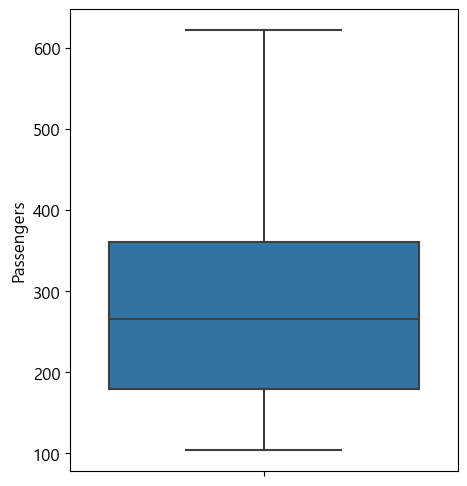

In [6]:
plt.figure(figsize=(5, 6))
sb.boxplot(data=df, y='Passengers')
plt.show()
plt.close()

### 4) 기본 형태의 시계열 그래프를 통한 정상성 확인

데이터의 패턴은 보이지만 비정상성임을 알 수 있다.

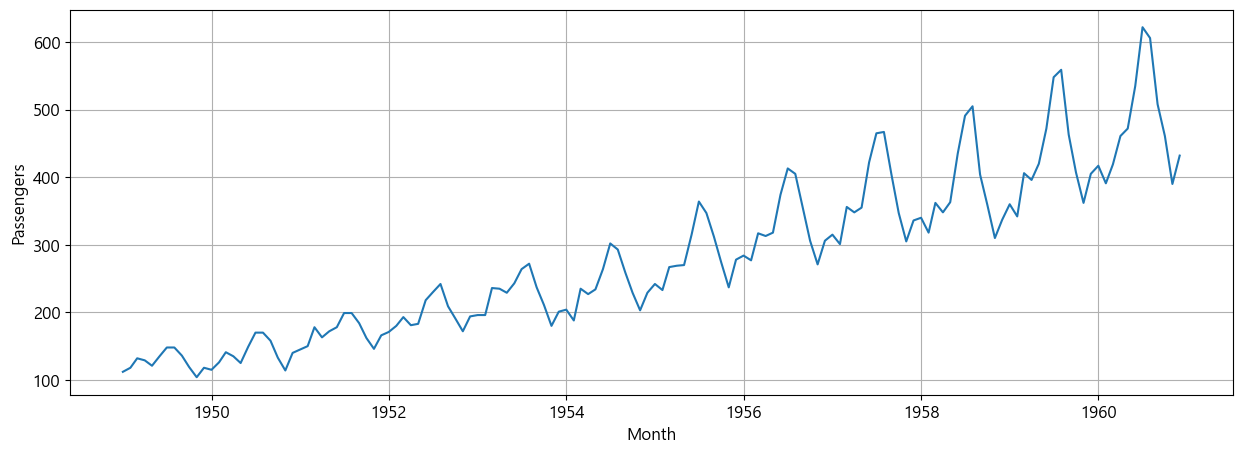

In [7]:
plt.figure()
sb.lineplot(df, x=df.index, y='Passengers')
plt.grid()
plt.show()
plt.close()

### 5) ADF 테스트

시계열 데이터의 정상성 여부를 판단하기 위한 검정

#### ADF 테스트의 가설

| 가설 | 내용 |
|---|---|
| 귀무가설 | 데이터가 정상성과 다르다 (=비정상성임을 의미) |
| 대립가설 | 데이터가 정상성이다. |

In [8]:
ar = adfuller(df['Passengers'])

print('검정통계량(ADF Statistic): %f' % ar[0])
print('유의수준(p-value): %f' % ar[1])
print('최적차수(num of lags): %f' % ar[2])
print('관측치 개수(num of observations): %f' % ar[3])
print('기각값(Critical Values):')
for key, value in ar[4].items():
    print('\t%s: %.3f' % (key, value))

print('데이터 정상성 여부: ', '정상' if ar[1] < 0.05 else '비정상')

검정통계량(ADF Statistic): 0.815369
유의수준(p-value): 0.991880
최적차수(num of lags): 13.000000
관측치 개수(num of observations): 130.000000
기각값(Critical Values):
	1%: -3.482
	5%: -2.884
	10%: -2.579
데이터 정상성 여부:  비정상


## #03. 평균 이동법을 통한 시계열 데이터 분석

가장 고전적인 시계열 데이터 분석 방법

주어진 구간의 평균을 구해서 이어서 표시하는 것으로 미래의 데이터를 예측한다.

평균 이동 결과가 실제 데이터와 얼마나 차이가 나는지의 여부로 데이터를 판단

과거로부터 현재까지의 시계열 자료를 대상으로 일정기간별 평균이동을 계산하면 이들의 추세를 통해 다음 기간을 예측할 수 있다. 

#### 1) 단순 이동평균 (SMA, Simple Moving Average)

- 가장 많이 사용하는 방식

##### 3개월, 6개월, 9개월 단위 평균

In [9]:
df['sma3'] = df['Passengers'].rolling(3).mean()
df['sma6'] = df['Passengers'].rolling(6).mean()
df['sma9'] = df['Passengers'].rolling(9).mean()
df

,Passengers,sma3,sma6,sma9
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,NaN
1949-03-01,132,120.666667,NaN,NaN
1949-04-01,129,126.333333,NaN,NaN
1949-05-01,121,127.333333,NaN,NaN
...,...,...,...,...
1960-08-01,606,587.666667,519.166667,480.888889
1960-09-01,508,578.666667,534.000000,492.333333
1960-10-01,461,525.000000,534.000000,497.222222


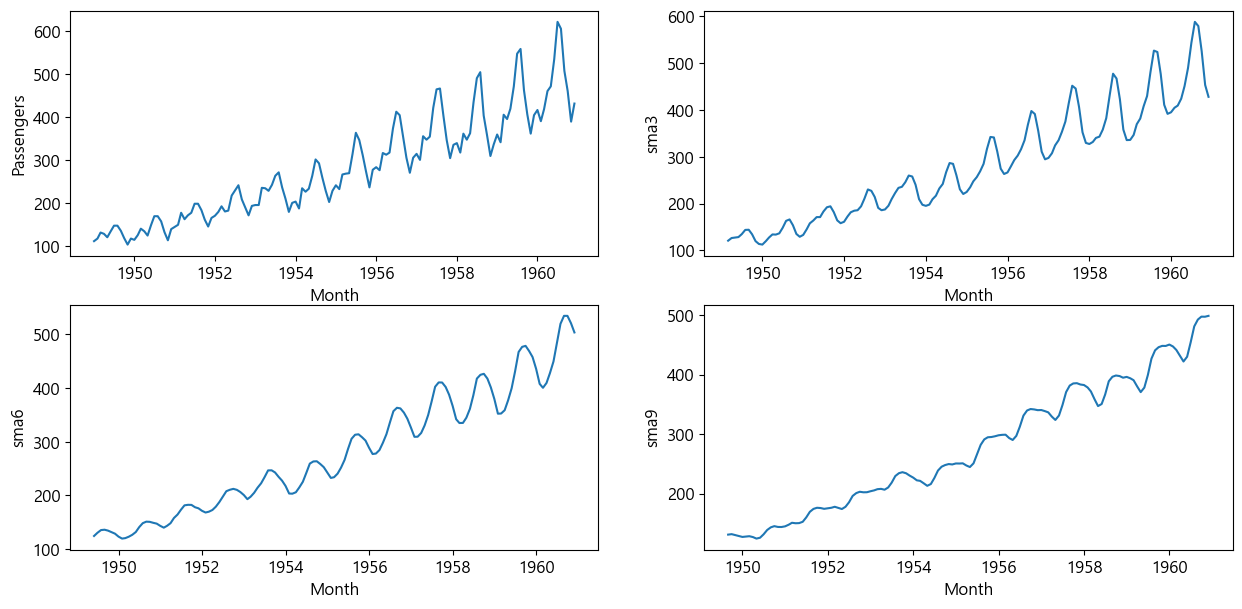

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 7))

sb.lineplot(df, x=df.index, y='Passengers', ax=ax1)
sb.lineplot(df, x=df.index, y='sma3', ax=ax2)
sb.lineplot(df, x=df.index, y='sma6', ax=ax3)
sb.lineplot(df, x=df.index, y='sma9', ax=ax4)

plt.show()
plt.close()

#### 2) 지수 이동 평균 (EMA, Exponetial Moving Average)

보다 최근의 값에 가중치를 두면서 이동평균을 계산하는 방법

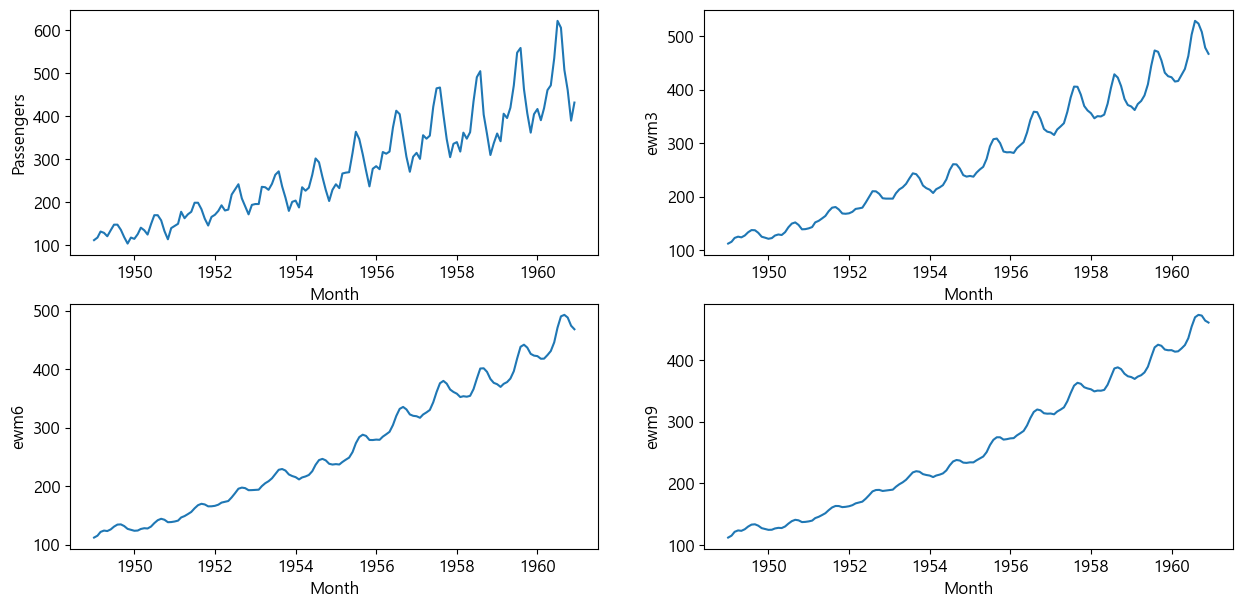

In [11]:
df['ewm3'] = df['Passengers'].ewm(3).mean()
df['ewm6'] = df['Passengers'].ewm(6).mean()
df['ewm9'] = df['Passengers'].ewm(9).mean()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 7))

sb.lineplot(df, x=df.index, y='Passengers', ax=ax1)
sb.lineplot(df, x=df.index, y='ewm3', ax=ax2)
sb.lineplot(df, x=df.index, y='ewm6', ax=ax3)
sb.lineplot(df, x=df.index, y='ewm9', ax=ax4)

plt.show()
plt.close()

## #03. ACF, PACF 검정

정상 시계열 데이터의 경우, ACF는 상대적으로 빠르게 0(상관관계 0)에 접근한다.

비정상 시계열 데이터의 경우, ACF는 천천히 감소하며 종종 큰 양의 값을 갖는다.

> 차분이 필요 없다고 판정되었으므로 원본 데이터로 진행한다.

| 구분 | $AR(p)$ 모델 적합 | $MA(q)$ 모델 적합 |
|---|---|---|
| ACF plot | 천천히 감소 | 첫 값으로부터 $q$개 뒤에 끊긴다. |
| PACF plot | 첫 값으로부터 $p$개 뒤에 끊긴다. | 천천히 감소 |

  

### ACF Plot

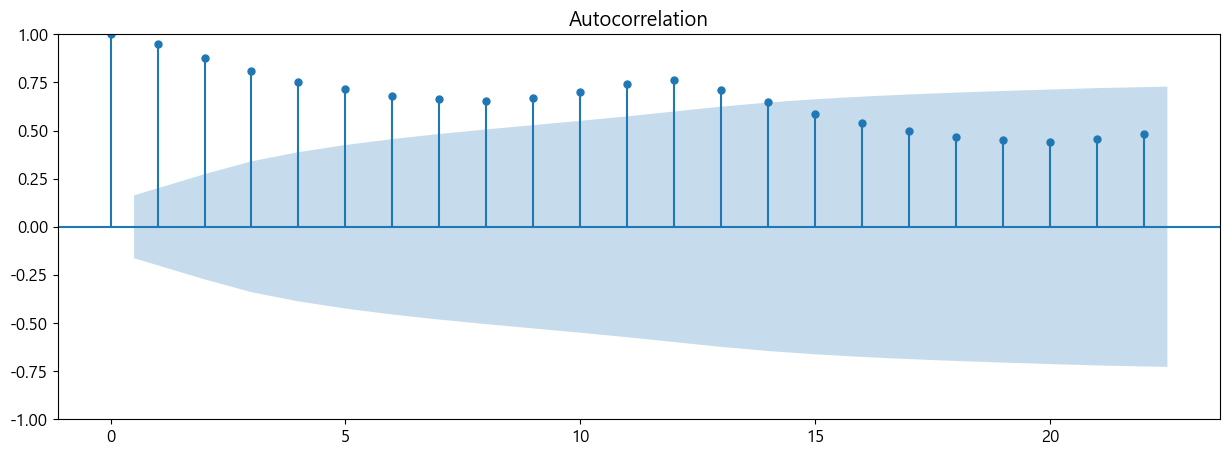

In [12]:
plot_acf(df['Passengers'])
plt.show()
plt.close()

### PACF Plot

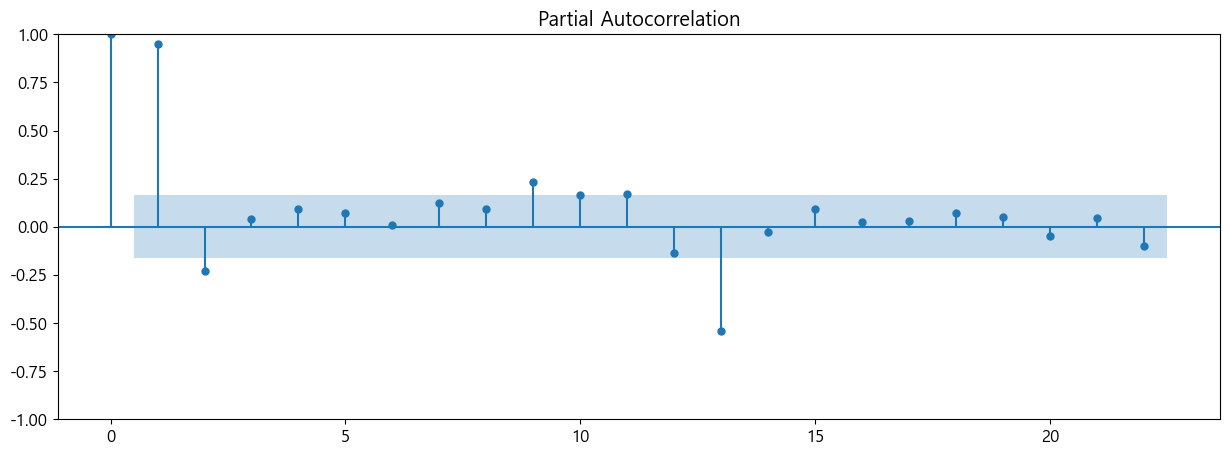

In [13]:
plot_pacf(df['Passengers'])
plt.show()
plt.close()

### ACF, PACF 서브플롯

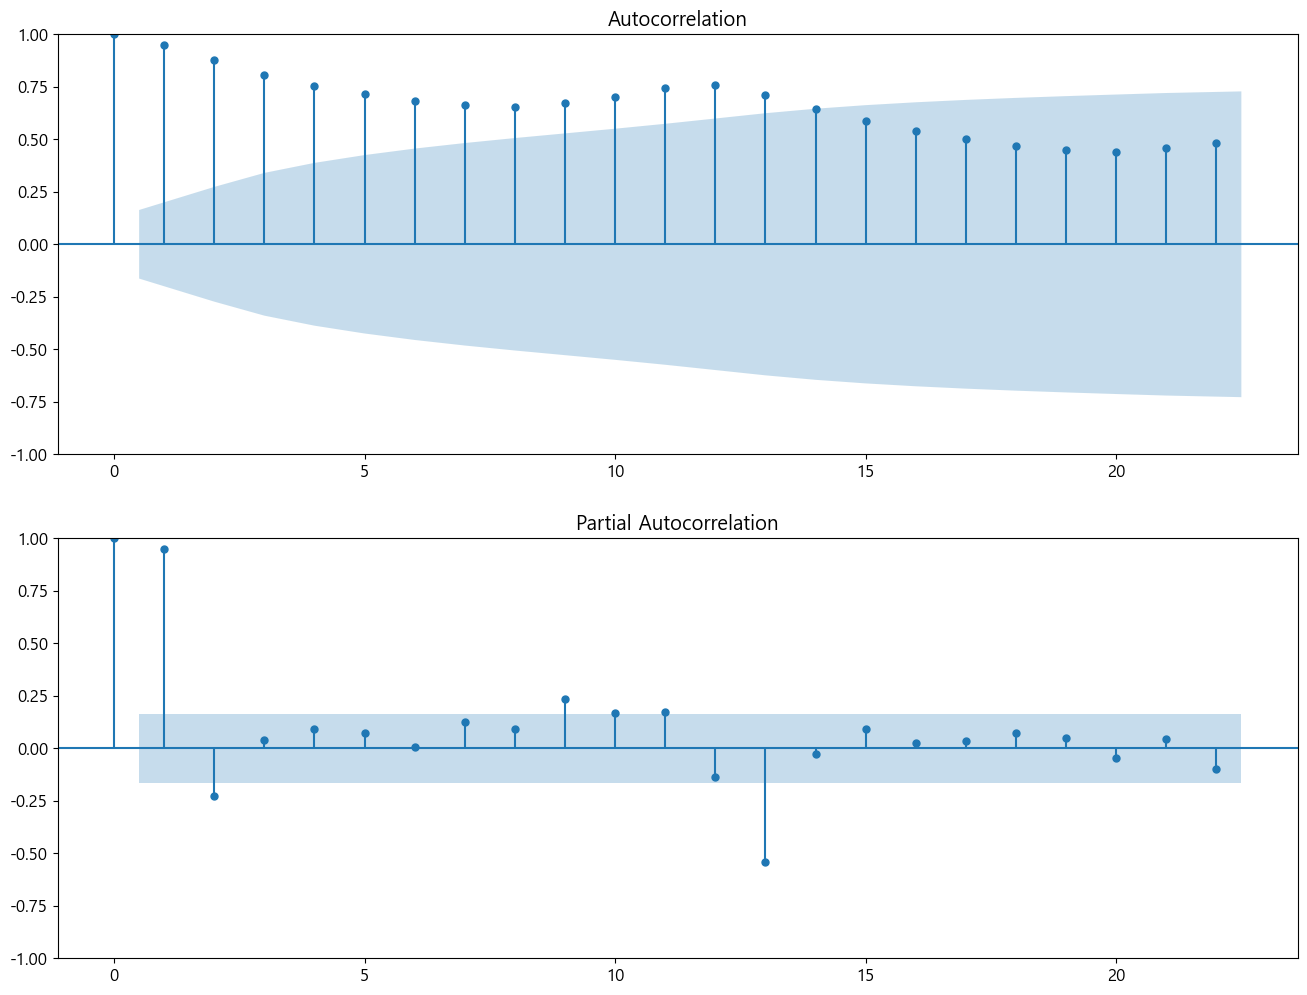

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

plot_acf(df['Passengers'], ax=ax1)
plot_pacf(df['Passengers'], ax=ax2)
plt.show()
plt.close()

#### 결과 판정

| 구분 | ACF plot | PACF plot |
|---|---|---|
| 감소 | 상대적으로 완만 | 상대적으로 급격 |
| 파란박스 진입 지점 | $p=1$ | $q=1$ |

이 결과를 고려하여 완만함을 보이는 ACF 플롯을 채택 

$AR(1)$ 모델로 결정

p-value가 0.05보다 작으므로 귀무가설을 기각하도 대립가설 채택. 즉 예제 데이터는 정상성 데이터

만약 귀무가설이 채택되어 정상성이 아니라고 판단될 경우 차분을 1회 수행하고 다시 ADF 검정을 수행

대립가설이 채택될 때 까지 이 과정을 반복함

반복횟수가 $d$ 값이 됨 

## #04. 시계열 분해

시계열 자료를 추세(Trend), 계절성(Seasonal), 잔차(Rasid)로 분해하는 데이터 전처리 방법

| 구분 | 설명 |
|--|--|
| 가법모델(Additive Model) | 시계열 데이터를 구성하는 각 성분이 덧셈을 통해 연결되어 있다고 가정 |
| 승법모델(Multiplicative Model) | 각 성분이 곱셈을 통해 연결되어 있다고 가정<br/>승법 모델은 로그 변환을 통해 가법 모델로 쉽게 변환 가능함 |

모델 선택은 시계열 데이터의 특성을 고려하면 되는데, 아래 그림의 왼편 그래프와 같이 시간에 따른 데이터 변동이 일정한 경우는 가법 모델을 활용한 데이터 분해가 적합함

![model](res/model.png)

### Multiplicative Model 시계열 분해 (승법 모델 적용)

In [15]:
#model_name = 'additive'         # 가법 모델
model_name = 'multiplicative'   # 승법 모델

sd = seasonal_decompose(df['Passengers'], model=model_name)

# trend, seasonal, residual 데이터 프레임으로 변환
sd_df = DataFrame({
    '관측값': sd.observed,
    '트렌드': sd.trend,
    '계절성': sd.seasonal,
    '잔차': sd.resid
}, index=df.index)

sd_df

,관측값,트렌드,계절성,잔차
Month,,,,
1949-01-01,112.0,NaN,0.910230,NaN
1949-02-01,118.0,NaN,0.883625,NaN
1949-03-01,132.0,NaN,1.007366,NaN
1949-04-01,129.0,NaN,0.975906,NaN
1949-05-01,121.0,NaN,0.981378,NaN
...,...,...,...,...
1960-08-01,606.0,NaN,1.219911,NaN
1960-09-01,508.0,NaN,1.060492,NaN
1960-10-01,461.0,NaN,0.921757,NaN


#### 분석결과 시각화 (자동구현)

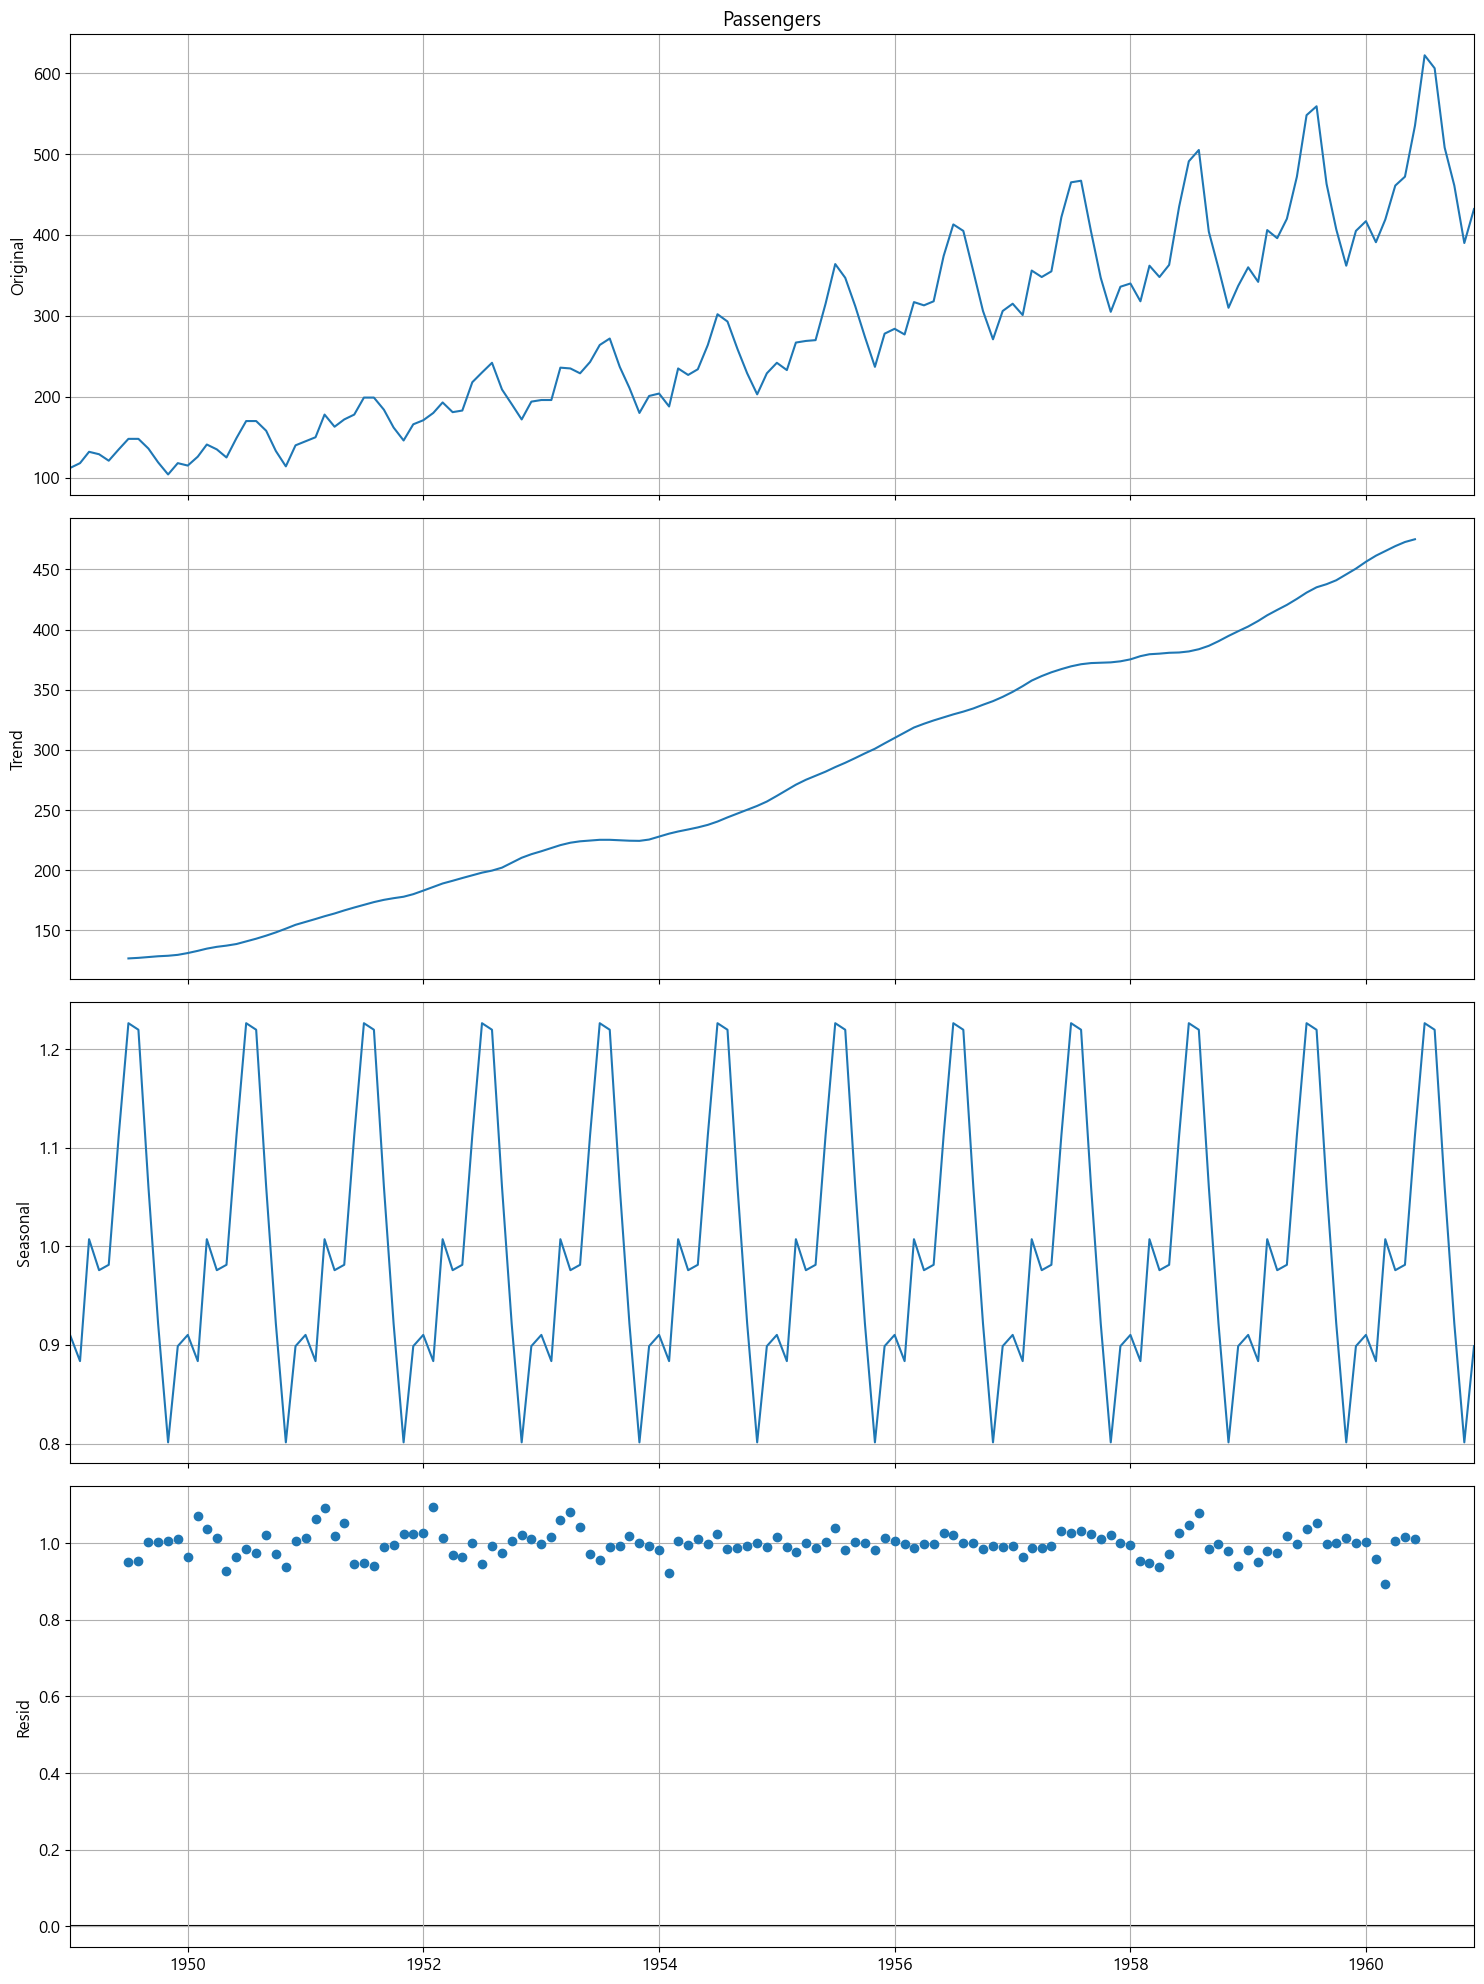

In [16]:
plt.rcParams["figure.figsize"] = (15, 20)
figure = sd.plot()
fig, ax1, ax2, ax3, ax4 = figure.get_children()

ax1.set_ylabel("Original")
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)

plt.show()